In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer


In [2]:
df=pd.read_csv("train.csv", usecols=['Age','Fare','Survived'])

In [3]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [4]:
df.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [5]:
df['Age'].fillna(df['Age'].mean(),inplace=True)

In [6]:
df.isnull().sum()

Survived    0
Age         0
Fare        0
dtype: int64

In [7]:
X=df.iloc[:,1:3]
y=df.iloc[:,0]


In [8]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [9]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

C:\Users\admin\AppData\Roaming\Python\Python310\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


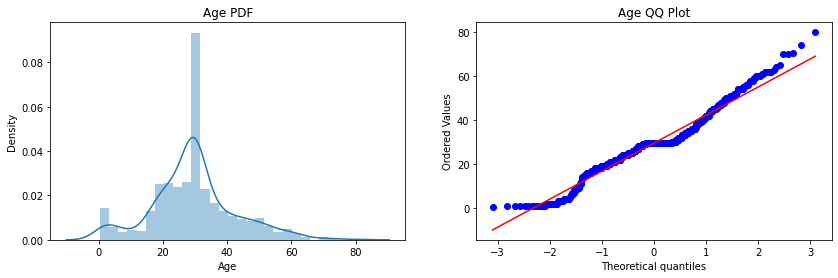

In [10]:
plt.figure(figsize=(14,4))
plt.subplot(121)#In subplot area, 1 row 2 column & and this plot is the first plot
sns.distplot(X_train['Age'])
plt.title('Age PDF')

plt.subplot(122)
stats.probplot(X_train['Age'], dist="norm", plot=plt)
plt.title('Age QQ Plot')

plt.show()

Its close to normal but not perfectly normal

C:\Users\admin\AppData\Roaming\Python\Python310\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


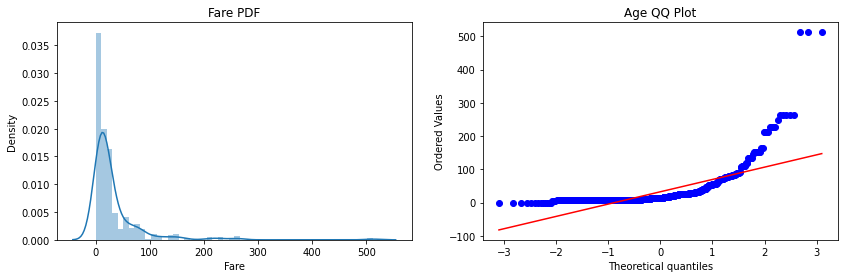

In [11]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.distplot(X_train['Fare'])
plt.title('Fare PDF')

plt.subplot(122)
stats.probplot(X_train['Fare'],dist='norm',plot=plt)
plt.title('Age QQ Plot')

plt.show()

This is not at all normally distributed & it is right skewed. As it is right skewed we will use log transform

# Before Log transformation

In [12]:
lr=LogisticRegression()
dtc=DecisionTreeClassifier()

In [13]:
lr.fit(X_train,y_train)
dtc.fit(X_train,y_train)

y_pred_lr=lr.predict(X_test)
y_pred_dtc=dtc.predict(X_test)

print("The accuracy of LR model is ", accuracy_score(y_pred_lr, y_test))
print("The accuracy of DTC model is ", accuracy_score(y_pred_dtc, y_test))

The accuracy of LR model is  0.6480446927374302
The accuracy of DTC model is  0.6759776536312849


# After Log transformation

np.log= Just applies log to all values but log(0)may cause problems
np.log1p=Before applying log, it just adds 1 to all values(X+1)

In [14]:
trf=FunctionTransformer(func=np.log1p)

In [15]:
X_train_transformed=trf.fit_transform(X_train)
X_test_transformed=trf.transform(X_test)

In [16]:
lr=LogisticRegression()
dtc=DecisionTreeClassifier()

lr.fit(X_train_transformed,y_train)
dtc.fit(X_train_transformed,y_train)

y_pred_lr=lr.predict(X_test_transformed)
y_pred_dtc=dtc.predict(X_test_transformed)

print("The accuracy of LR model is ", accuracy_score( y_test,y_pred_lr))
print("The accuracy of DTC model is ", accuracy_score( y_test,y_pred_dtc))

The accuracy of LR model is  0.6815642458100558
The accuracy of DTC model is  0.6871508379888268


There was not much difference in decision tree classifier as there are such algorithms, where function transforming doesnt affect

In [17]:
#Cross Validation
X_transformed=trf.fit_transform(X)

lr=LogisticRegression()
dtc=DecisionTreeClassifier()

print("LR: ", np.mean(cross_val_score(lr,X_transformed,y,scoring='accuracy',cv=10)))
print("DTC", np.mean(cross_val_score(dtc,X_transformed,y,scoring='accuracy',cv=10)))

LR:  0.678027465667915
DTC 0.6621847690387017


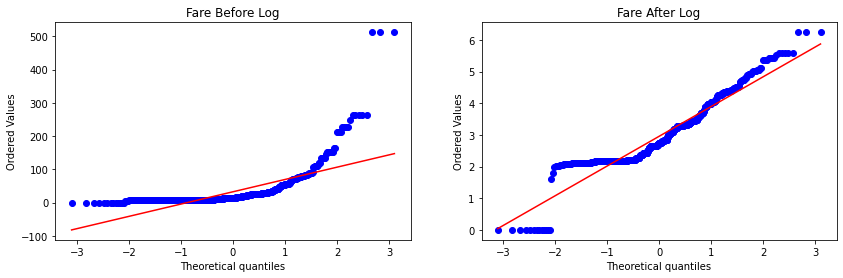

In [18]:
plt.figure(figsize=(14,4))
plt.subplot(121)
stats.probplot(X_train['Fare'],dist='norm',plot=plt)
plt.title('Fare Before Log')


plt.subplot(122)
stats.probplot(X_train_transformed['Fare'],dist='norm',plot=plt)
plt.title('Fare After Log')

plt.show()

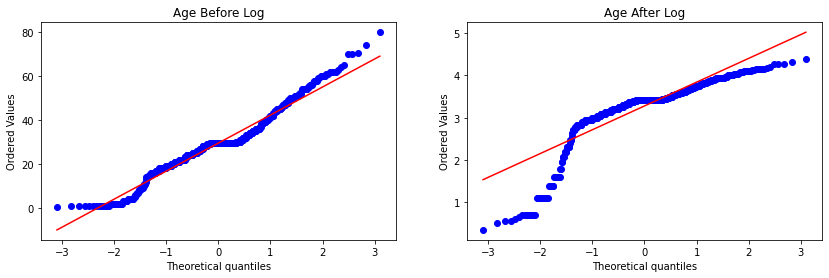

In [19]:
plt.figure(figsize=(14,4))
plt.subplot(121)
stats.probplot(X_train['Age'],dist='norm',plot=plt)
plt.title('Age Before Log')


plt.subplot(122)
stats.probplot(X_train_transformed['Age'],dist='norm',plot=plt)
plt.title('Age After Log')

plt.show()

Age after log transformation became more bad, but anyways it was not right skewed but we still applied log.. that is the reason. Best practice is we dont apply log transformation to age

In [20]:
trf2 = ColumnTransformer([('log',FunctionTransformer(np.log1p),['Fare'])],remainder='passthrough')

X_train_transformed2 = trf2.fit_transform(X_train)
X_test_transformed2 = trf2.transform(X_test)

In [21]:
lr = LogisticRegression()
dtc = DecisionTreeClassifier()

lr.fit(X_train_transformed2,y_train)
dtc.fit(X_train_transformed2,y_train)
    
y_pred = lr.predict(X_test_transformed2)
y_pred2 = dtc.predict(X_test_transformed2)
    
print("Accuracy LR",accuracy_score(y_test,y_pred))
print("Accuracy DT",accuracy_score(y_test,y_pred2))

Accuracy LR 0.6703910614525139
Accuracy DT 0.659217877094972


In [22]:
X_transformed2=trf2.fit_transform(X)

lr=LogisticRegression()
dtc=DecisionTreeClassifier()

print("LR: ", np.mean(cross_val_score(lr,X_transformed2,y,scoring='accuracy',cv=10)))
print("DTC", np.mean(cross_val_score(dtc,X_transformed2,y,scoring='accuracy',cv=10)))

LR:  0.6712609238451936
DTC 0.6577403245942571


In [23]:
def apply_transform(transform):
    X = df.iloc[:,1:3]
    y = df.iloc[:,0]
    
    trf = ColumnTransformer([('log',FunctionTransformer(transform),['Fare'])],remainder='passthrough')
    
    X_trans = trf.fit_transform(X)
    
    clf = LogisticRegression()
    
    print("Accuracy",np.mean(cross_val_score(clf,X_trans,y,scoring='accuracy',cv=10)))
    
    plt.figure(figsize=(14,4))

    plt.subplot(121)
    stats.probplot(X['Fare'], dist="norm", plot=plt)
    plt.title('Fare Before Transform')

    plt.subplot(122)
    stats.probplot(X_trans[:,0], dist="norm", plot=plt)
    plt.title('Fare After Transform')

    plt.show()

Accuracy 0.61729088639201


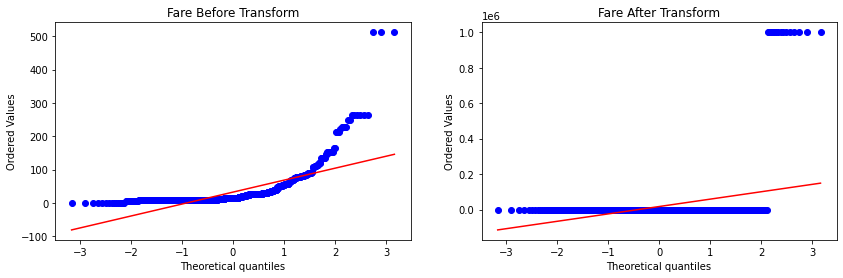

In [35]:
# apply_transform(lambda x: x)# Without transformation
# apply_transform(lambda x: x**2)#square=suitable for left skewed
#apply_transform(lambda x: x**3)#cube
#apply_transform(lambda x: x**1/2)#squareroot
apply_transform(lambda x: 1/(x+0.000001)) # adding 0.000001 because there is some value =0
# apply_transform(np.sin)
